In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stat
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:\Study Material\Data Science\Data Sets\House_Price Data Set')

In [4]:
house_sale = pd.read_csv('House_Prices.csv')

In [5]:
house_sale.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [6]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


### From the data we can see that there is no missing data present in the data set

Also we can clearly see that 'Home' feature is not an important feature as values are unique for all the rows, and do not shows any relation with any of the features, So we are droping the variable.

In [7]:
house_sale = house_sale.drop('Home',axis=1)

In [8]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


In [9]:
house_sale.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,26868.770371,211.572431,0.725951,0.514492,1.069324
min,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


(array([ 3.,  7., 24., 30., 18., 24., 11.,  6.,  3.,  2.]),
 array([ 69100.,  83310.,  97520., 111730., 125940., 140150., 154360.,
        168570., 182780., 196990., 211200.]),
 <a list of 10 Patch objects>)

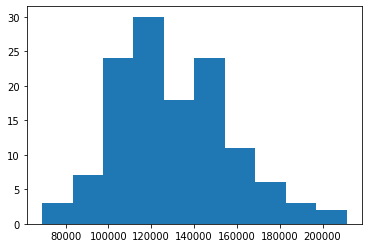

In [13]:
plt.hist(house_sale['Price'],bins=10)

### Sale is more in the price range of 1,00000 to 1,30000 and in between 1,40000 to 1,50000. As the price is increasing very less amount of peoples are willing to buy the house.

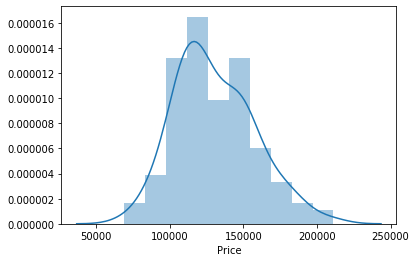

In [14]:
sns.distplot(house_sale['Price'])

### As we can see that there is no such fat-tailed distribution in curve, forming a proper normal distribution curve. so we can conclude that there is no outliers present in the data

(array([ 3.,  4., 16., 15., 32., 24., 18.,  9.,  5.,  2.]),
 array([1450., 1564., 1678., 1792., 1906., 2020., 2134., 2248., 2362.,
        2476., 2590.]),
 <a list of 10 Patch objects>)

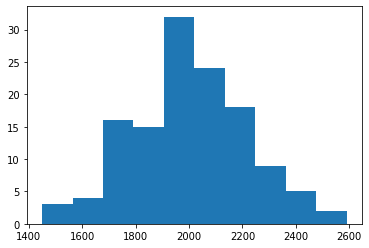

In [15]:
plt.hist(house_sale['SqFt'],bins=10)

From the above histogram for the feature 'SqFt' we can see that square feet of the house is effecting the increase and decrease in the count of the sale.

## For categorical Features

In [17]:
make_dist = house_sale.Neighborhood.value_counts()

In [18]:
make_dist

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

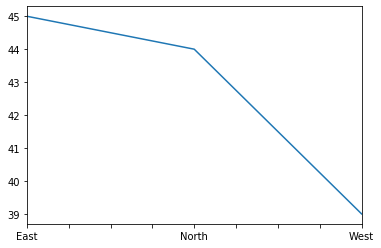

In [23]:
make_dist.plot()

### Above graph shows the count of neighborhood in the different regions

In [30]:
cat_dist = house_sale.Brick.value_counts()
cat_dist.head()

No     86
Yes    42
Name: Brick, dtype: int64

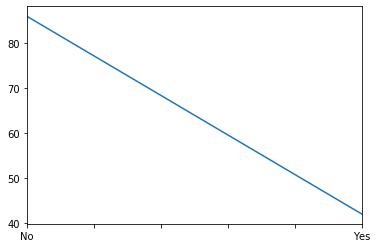

In [29]:
cat_dist.plot()

In [25]:
house_sale_num = house_sale.select_dtypes('int64')

In [27]:
house_sale_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
Price        128 non-null int64
SqFt         128 non-null int64
Bedrooms     128 non-null int64
Bathrooms    128 non-null int64
Offers       128 non-null int64
dtypes: int64(5)
memory usage: 5.1 KB


In [32]:
house_corr = house_sale_num.corr()['Price']
house_corr

Price        1.000000
SqFt         0.552982
Bedrooms     0.525926
Bathrooms    0.523258
Offers      -0.313636
Name: Price, dtype: float64

IndexError: index 0 is out of bounds for axis 1 with size 0

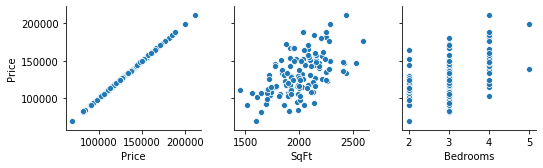

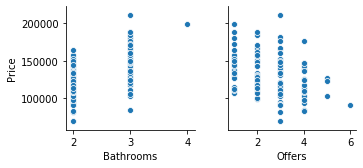

<Figure size 0x180 with 0 Axes>

In [38]:
for i in range(0,len(house_sale_num),3):
    sns.pairplot(house_sale_num,y_vars=['Price'],x_vars=house_sale_num.columns[i:i+3])